In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 


In [2]:
veriler = pd.read_csv("musteriler.csv")

In [3]:
veriler.head()

,No,Cinsiyet,Yas,Hacim,Maas
0,1,K,60,69900,6325
1,2,K,30,79000,5200
2,3,E,52,85500,7825
3,4,E,57,17100,8375
4,5,E,55,5500,5450


In [4]:
X = veriler.iloc[:,3:].values

In [5]:
X

array([[ 69900,   6325],
       [ 79000,   5200],
       [ 85500,   7825],
       [ 17100,   8375],
       [  5500,   5450],
       [ 27200,   8550],
       [ 20500,   4500],
       [ 69000,   5050],
       [ 13200,   8325],
       [ 31800,   5975],
       [ 59200,   5700],
       [ 95800,   6475],
       [ 46200,   3850],
       [ 29800,   4100],
       [ 83000,   8125],
       [143500,   8650],
       [ 91300,   5125],
       [  9800,   3950],
       [ 79500,   5325],
       [ 66400,   5775],
       [ 25900,   3400],
       [     0,   7075],
       [ 90900,   5725],
       [ 51800,   4300],
       [126800,   7500],
       [ 40800,   5000],
       [ 26400,   5325],
       [ 76100,   5350],
       [ 26500,   2600],
       [ 37200,   6250],
       [  4000,   3075],
       [ 34500,   4875],
       [ 47100,   5525],
       [ 95600,   7225],
       [ 35400,   5275],
       [ 41100,   6050],
       [ 46400,   3425],
       [ 10400,   4600],
       [ 50100,   4575],
       [111300,   8525],


In [6]:
from sklearn.cluster import KMeans

In [7]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++')
kmeans.fit(X)
print(kmeans.cluster_centers_)

[[ 58643.47826087   5844.92753623]
 [104386.95652174   7289.13043478]
 [ 22069.41176471   5320.88235294]]


In [8]:
sonuclar = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = "k-means++", random_state = 123)
    kmeans.fit(X)
    sonuclar.append(kmeans.inertia_)

C:\Users\cetki\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [9]:
sonuclar

[242389902746.875,
 69083288306.74913,
 37362865661.97312,
 19665039712.795002,
 12911353632.710127,
 8631933632.939522,
 6759928141.384079,
 5301517432.980299,
 4172822197.44695,
 3330255811.5491543]

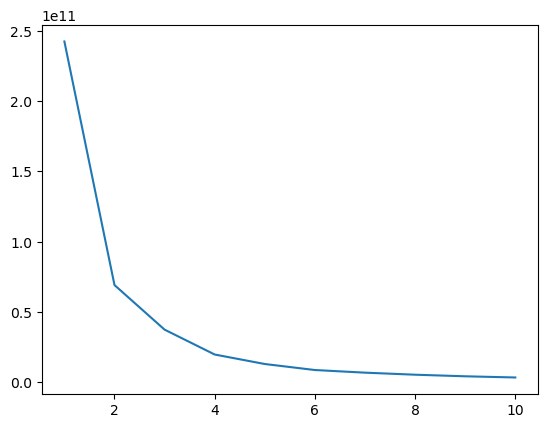

In [14]:
plt.plot(range(1,11),sonuclar)
plt.show()

In [11]:
# 2 veya 4 alınabilir, dirsek noktası

In [12]:
#kümeleme algoritmalarında en çnemlisi k means

In [32]:
# hyaraccial clustering
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters = 4, affinity = "euclidean", linkage = "ward")
Y_tahmin=ac.fit_predict(X)
print(Y_tahmin)

[0 0 0 2 2 2 2 0 2 1 1 0 1 2 0 3 0 2 0 0 2 2 0 1 3 1 2 0 2 1 2 1 1 0 1 1 1
 2 1 3 0 2 0 2 2 1 1 1 1 3 2 0 3 3 0 0 2 0 1 0 3 0 1 2 1 2 1 0 1 2 0 0 0 0
 2 2 3 0 1 2 2 2 1 1 3 0 0 1 2 2 0 2 3 1 2 1 2 0 2 2 1 3 0 2 2 0 0 1 1 3 3
 0 0 0 0 1 2 0 1 1 2 1 0 0 0 1 2 2 3 2 2 1 1 1 1 2 1 1 0 1 0 2 1 1 0 1 1 1
 1 2 1 1 0 2 1 3 2 1 3 2 1 1 2 1 2 1 1 0 2 2 0 2 2 1 1 2 2 1 3 1 1 0 1 3 0
 3 2 2 1 2 1 2 1 0 2 0 0 1 1 1]


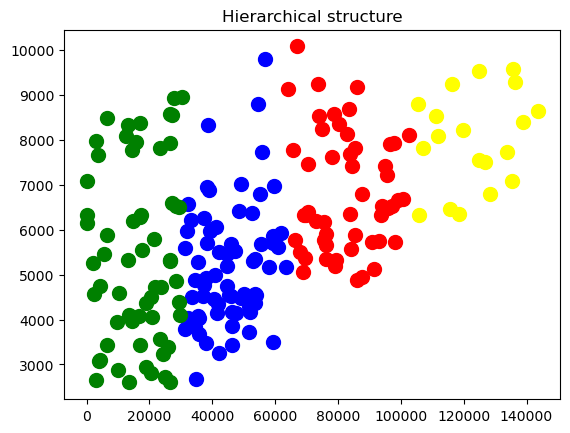

In [33]:
plt.scatter(X[Y_tahmin==0,0], X[Y_tahmin==0,1], s= 100, c = "red")
plt.scatter(X[Y_tahmin==1,0], X[Y_tahmin==1,1], s= 100, c = "blue")
plt.scatter(X[Y_tahmin==2,0], X[Y_tahmin==2,1], s= 100, c = "green")
plt.scatter(X[Y_tahmin==3,0], X[Y_tahmin==3,1], s= 100, c = "yellow")
plt.title("Hierarchical structure")
plt.show()


[2 2 2 1 1 1 1 2 1 3 3 2 3 1 2 0 2 1 2 2 1 1 2 3 0 3 1 2 1 3 1 3 3 2 3 3 3
 1 3 0 0 1 2 1 1 3 3 3 3 0 1 2 0 0 2 2 1 2 3 2 0 2 3 1 3 1 3 2 3 1 2 2 2 2
 1 1 0 2 3 1 1 1 3 3 0 2 2 3 1 1 2 1 0 3 1 3 1 2 1 1 3 0 2 1 1 2 2 3 3 0 0
 2 2 2 2 3 1 2 3 3 1 3 2 2 2 3 1 1 0 1 1 3 3 3 3 1 3 3 2 3 2 1 3 3 2 3 3 3
 3 1 3 3 2 1 3 0 1 3 0 1 3 3 3 3 1 3 3 2 1 1 2 1 1 3 2 1 1 3 0 3 3 2 3 0 2
 0 1 1 3 1 3 1 3 2 1 2 2 3 3 3]


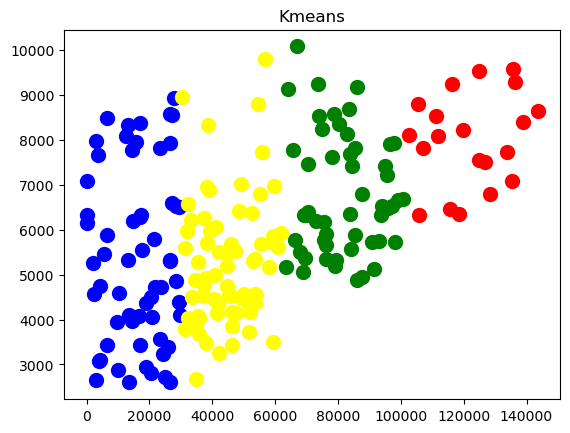

In [31]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 123)
Y_tahmin = kmeans.fit_predict(X)
print(Y_tahmin)

plt.scatter(X[Y_tahmin==0,0], X[Y_tahmin==0,1], s= 100, c = "red")
plt.scatter(X[Y_tahmin==1,0], X[Y_tahmin==1,1], s= 100, c = "blue")
plt.scatter(X[Y_tahmin==2,0], X[Y_tahmin==2,1], s= 100, c = "green")
plt.scatter(X[Y_tahmin==3,0], X[Y_tahmin==3,1], s= 100, c = "yellow")
plt.title("Kmeans")
plt.show()

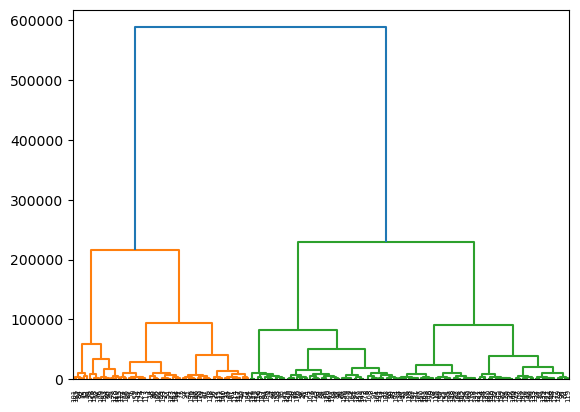

In [34]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X,method="ward"))
plt.show()